# Исследование компьютерных игр

В моем доступе исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
Для этого необходимо выполнить следующие шаги:
1. Изучить данные
2. Провести предобработку данных (удалить дубликаты, изменить тип данных, заполнить пропуски, привести все к нижнему регистру, добавить необходимый столбец с суммарными продажами)
3. Исследовательский анализ данных (Сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие платформы лидируют, как влияют на продажи отзывы, какие жанры пользуются наибольшим спросом)
4. Составить портрет пользователя по каждому региону(определить самые популярные платформы, самые популярные жанры, влияние рейтинга ESRB)
5. Проверка сформулированных гипотез
6. Вывод о проделанной работе

## Изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
#импорт библиотек, необходимых для ислледования

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.info()
#прочтение файла и получение основной информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(15)
#первые 15 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


###### Вывод: 
После получения и изучения первичных данных можно сделать вывод о необходимости на следующем этапе предобработки привести названия столбцов к змеиному регистру, обработать пропуски, изменить тип данных колонки 'year_of_release'. 

## Предобработка данных

### Изменение регистра 

###### Для начала изменим названия столбцов в соответствие со змеиным регистром.

In [4]:
games.columns = [x.lower() for x in games.columns]

### Обработка пропущенных значений

###### Изучим пропущенные значения и заполним их по возможности.

In [5]:
games.isna().sum() #количество пропусков и в каких столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах 'name' 'genre' принадлежат таким играм, по который почти нет данных, следовательно просто удалим такие строки.

In [8]:
games[games['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games = games.dropna(subset=['name'])

Чтобы далее изменить тип данных в колонке 'year_of_release' заполним пропуски нулевым значением, которые потом отфильтруем для дальнейшего анализа. Можно предположить, что причиной пропуска стали следующие ситуации: выход игры отложили или выпустили под другим названием.

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(0.0)

Проверим продажи данных игр, вдруг там высокоприбыльные игры

In [11]:
games_view = games.query('year_of_release == 0')
games_view.sort_values(by = ['na_sales', 'eu_sales', 'jp_sales'], ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,0.0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
15704,Writing and Speaking Beautiful Japanese DS,DS,0.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,0.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15998,Jet Impulse,DS,0.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,0.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [12]:
games = games.query('year_of_release > 0')

Заполним значения в столбцах 'user_score' и 'critic_score' на заведомо неверные данные, чтобы можно было изменить тип данных и отфильтровать их при необходимости анализа данных параметров в дальнейшем исследовании. 

In [13]:
games['critic_score'] = games['critic_score'].fillna(101)

Значение "tbd" в столбце 'user_score' - это аббревиатура - to be determined, которая означает, что рейтинг еще не определен. Значит можно заменить данные значения на пропуски.

In [14]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
games['user_score'] = games['user_score'].fillna(100)

Заполним значения в столбце 'rating' на 'unknown'. Возможно, компания не захотела присваивать своей игре категорию или возрастное ограничение определено в другой системе оценки (не ESRB). 

In [16]:
games['rating'] = games['rating'].fillna('unknown')

### Изменение типа данных

Изменим тип колонок с данными года выпуска и оценки критиков на целочисленный, а данные оценок пользователей на вещественный, так как в датафрейме в основном такие оценки.

In [17]:
games = games.astype({'year_of_release':'int',
              'critic_score':'int',
              'user_score':'float64'})

In [18]:
games.isna().sum() #проверяем результат обработки пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Создание дополнительного столбца

######  Создадим столбец с данными о суммарных продажах во всех регионах

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [20]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


### Проверка датасета на наличие дубликатов

In [21]:
games['name_lower'] = games['name'].str.lower()
games['platform_lower'] = games['platform'].str.lower()
games['genre_lower'] = games['genre'].str.lower()
games['rating_lower'] = games['rating'].str.lower()
#приведение столбцов с категориальным типом данных в нижний регистр для проверки дубликатов

In [22]:
games.duplicated().sum()

0

Полные дубликаты не найдены. Посмотрим наличие неявных дебликатов.

In [23]:
games[games.duplicated(subset=['name_lower','platform_lower', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_lower,platform_lower,genre_lower,rating_lower
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01,madden nfl 13,ps3,sports,e


Обнаружена одна строка с неполными дубликатами

In [24]:
games_dupl = games.query('name_lower == "madden nfl 13" & platform_lower == "ps3"')
games_dupl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_lower,platform_lower,genre_lower,rating_lower
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56,madden nfl 13,ps3,sports,e
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01,madden nfl 13,ps3,sports,e


Действительно данные повторяются, причем первая запись более полная, ее и оставим для дальнейшего исследования

In [25]:
games = games.drop(index= 16230)

In [26]:
games.reset_index().info() #обновим индексы и посмотрим итоговую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     16443 non-null  int64  
 10  user_score       16443 non-null  float64
 11  rating           16443 non-null  object 
 12  total_sales      16443 non-null  float64
 13  name_lower       16443 non-null  object 
 14  platform_lower   16443 non-null  object 
 15  genre_lower      16443 non-null  object 
 16  rating_lower     16443 non-null  object 
dtypes: float64(6

Вывод: В результате предобработки данных удалось полностью избавиться от пропусков, изменен тип данных на более корректный, а также создан столбец 'total_sales' c данными о суммарных продажах в регионах. Наличие пропусков может быть объяснено ранним выходом игры (до 2000 года) или наоборот совсем недавним, где оценки еще не успели занести в датафрейм. Полных дубликатов в данном датасете не обнаружено. Обработаны две строчки с неявными дубликатами.

## Исследовательский анализ данных

### Количество выпущенных игр в разные годы.

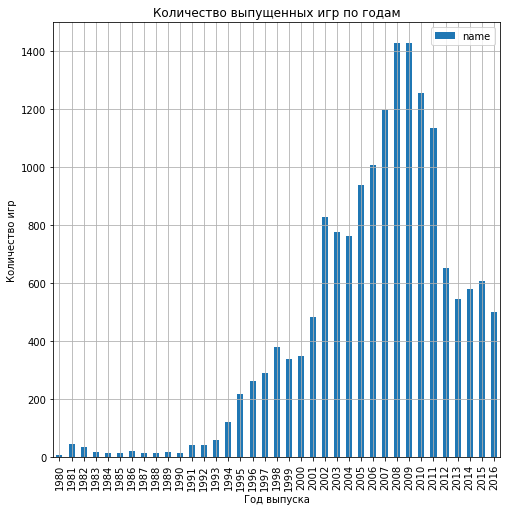

In [27]:
games_year = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
games_year.plot(kind = 'bar', grid = True, figsize = (8,8))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

По данному графику видно, что основной рост игровой индустрии пришелся на 2004-2008 года. Максимальное количество игр было выпущено 2008-2009 годах, после чего это значение стало снижаться. 

Данными об играх, выпущенных в период 1980-1992, можно пренебречь ввиду их малого количества. Удаление этих данных не повлияет на прогноз на 2017 год. 

In [28]:
games = games.query('year_of_release > 1992') #отфильтруем ненужные данные

### График зависимости продаж от платформ.

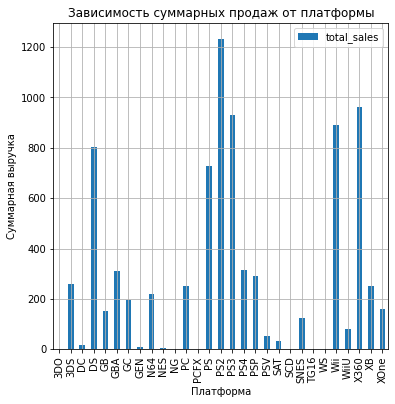

In [29]:
games_platforms = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
games_platforms.sort_values(by='total_sales', ascending = False).head(10)
games_platforms.plot(kind = 'bar', grid = True, figsize = (6,6))
plt.title('Зависимость суммарных продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарная выручка')
plt.show()

Самыми прибыльными платформами оказались PS2, X360, PS3, Wii, DS, PS, PS4. Cоздадим список с этими платформами.

In [30]:
popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'] 
#список платформ с наибольшими суммарными продажами

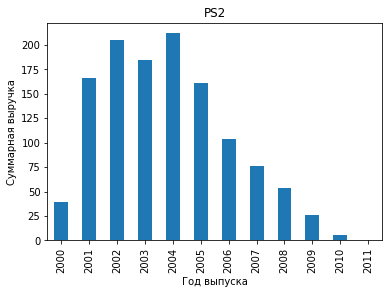

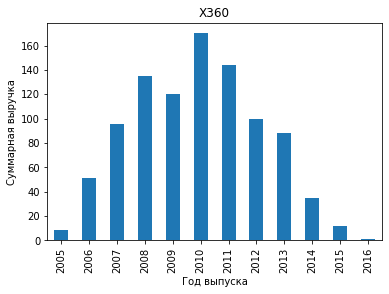

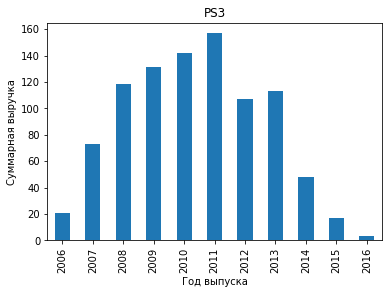

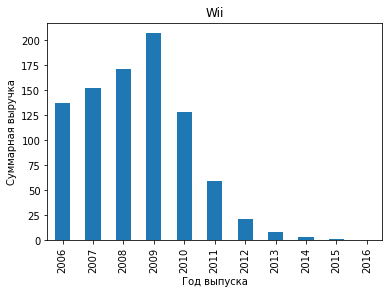

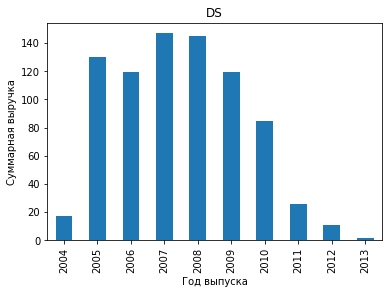

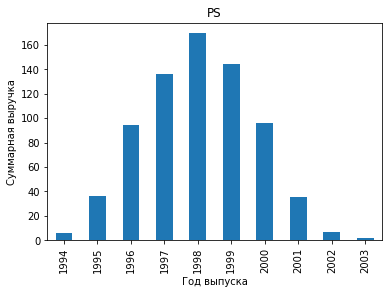

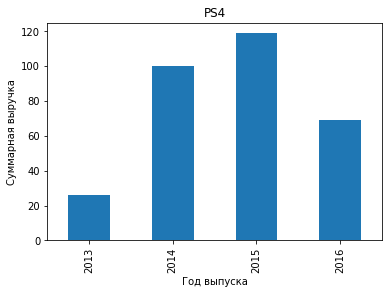

In [31]:
for platform in popular_platforms:
    games[games['platform'] == platform] \
    .groupby('year_of_release')['total_sales'].sum() \
    .plot(kind = 'bar')
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарная выручка')
    plt.show()
#цикл для построения распределения суммарных продаж по годам в зависимости от платформы

Вывод: Большинство платформ 'живут' в течение 10 лет после выхода. Наибольшую прибыль приносят в первые 5 лет существования. 

###### Выбор потенциально прибыльных платформ

Определим актуальный период с 2013 по 2016 год для построения прогноза на 2017 год.

In [32]:
good_games = games.query('year_of_release > 2013')

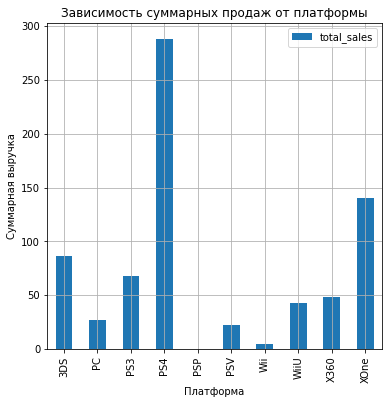

In [33]:
good_games_platforms = good_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
good_games_platforms.sort_values(by='total_sales', ascending = False)
good_games_platforms.plot(kind = 'bar', grid = True, figsize = (6,6))
plt.title('Зависимость суммарных продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарная выручка')
plt.show()

In [37]:
good_platforms = good_games['platform'].unique()
good_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

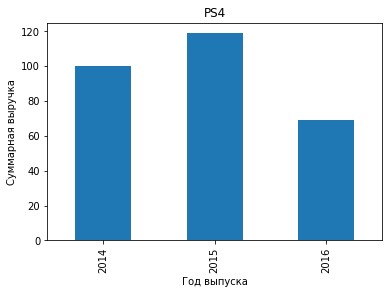

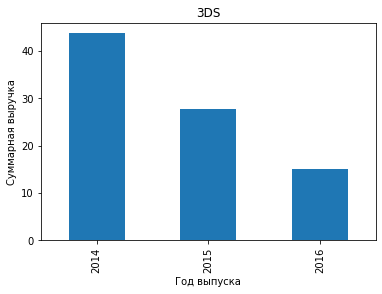

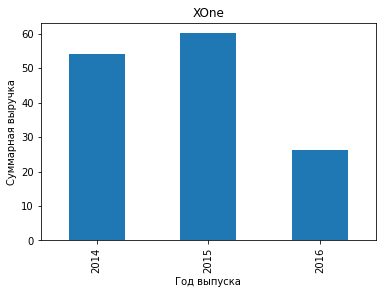

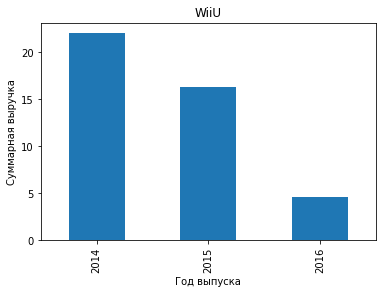

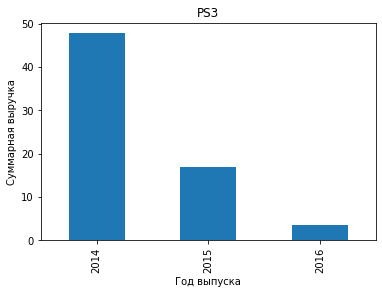

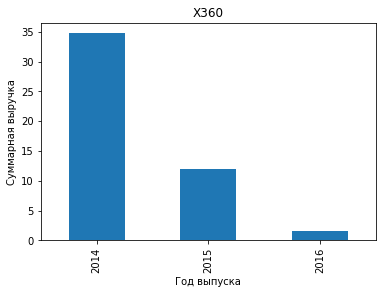

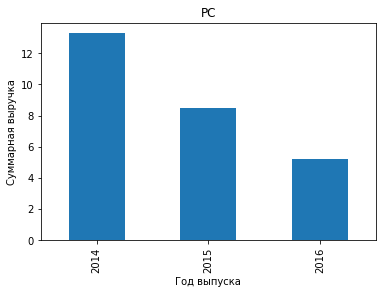

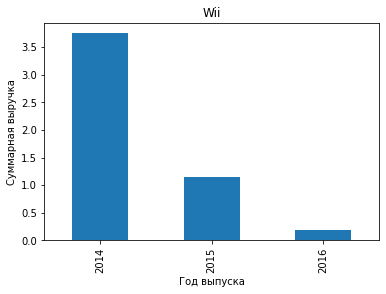

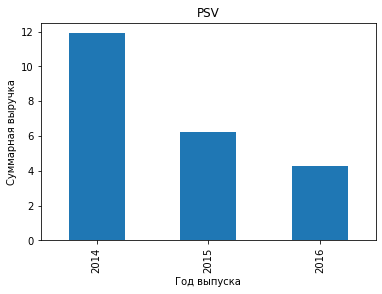

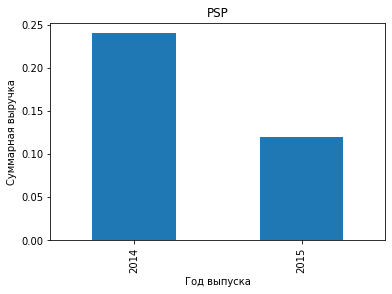

In [38]:
for platform in good_platforms:
    good_games[good_games['platform'] == platform] \
    .groupby('year_of_release')['total_sales'].sum() \
    .plot(kind = 'bar')
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарная выручка')
    plt.show()
#цикл для построения распределения суммарных продаж по годам в зависимости от платформы

Вывод: В 2017 году стоит сделать ставку на PS4 и XOne, так как они сравнительно недавно появились на рынке. Тажке не стоит забывать про PC, игры на этой платформе актуальны всегда, так как характеристики персональных компьютеров улучшаются с годами

###### Построение 'ящика с усами' по глобальным продажам игр.

In [39]:
good_games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


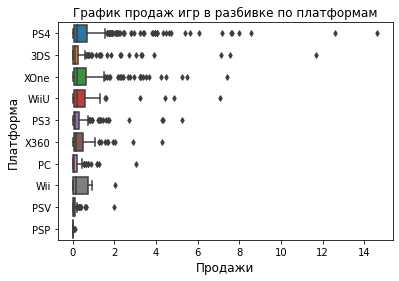

In [40]:
boxplot = sns.boxplot(x = 'total_sales', y = 'platform', data = good_games, fliersize = 4)
boxplot.axes.set_title("График продаж игр в разбивке по платформам", fontsize=12)
boxplot.set_xlabel("Продажи", fontsize=12)
boxplot.set_ylabel("Платформа", fontsize=12);

Вывод: На графике видны аномалии почти в каждой платформе, возможно речь идет о некоторых очень успешных играх, выпущенных на этой платорме. Особенно выделяется SonyPlaystation4.

Text(0, 0.5, 'Платформа')

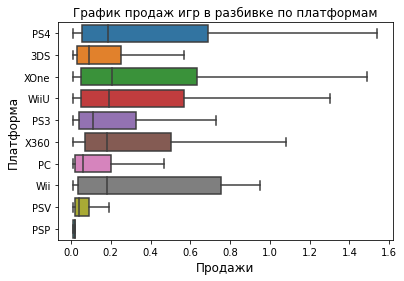

In [41]:
boxplot = sns.boxplot(x = 'total_sales', y = 'platform', data = good_games, showfliers = False)
boxplot.axes.set_title("График продаж игр в разбивке по платформам", fontsize=12)
boxplot.set_xlabel("Продажи", fontsize=12)
boxplot.set_ylabel("Платформа", fontsize=12)


Вывод: По диаграммам размаха можно определить популярность платформы. Определить можно по объему продаж, входящему в межквартильный размах и медианному значению, чем они выше тем популярнее платформа. Например на этой диаграмме видно, что наиболее популярны следующие платформы - PS4 или X360.

###### Влияние отзывов на продажи

In [42]:
good_games_user = good_games[(good_games['user_score'] != 11)] 
good_games_critic = good_games[(good_games['critic_score'] != 101)] 
#отфильтруем заведомо ложнозаполненные данные

In [43]:
ps4_user = good_games_user[(good_games_user['platform'] == 'PS4')] #отфильтруем данные по одной из платформ

In [44]:
ps4_user['user_score'].corr(ps4_user['total_sales']) #определим корреляцию Пирсона

-0.11919737701153027

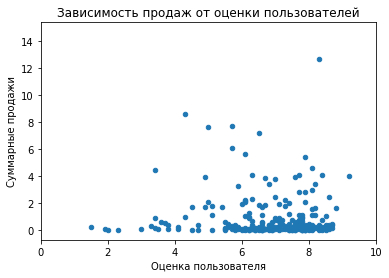

In [45]:
ps4_user.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', xlim = (0,10))
plt.xlabel('Оценка пользователя')
plt.ylabel('Суммарные продажи')
plt.title('Зависимость продаж от оценки пользователей')
plt.show()

Такая диаграмма рассеяния и коэффициент корреляция говорят о независимости этих двух параметров. Высокая оценка пользователя совсем не гарантирует высокую прибыль от игры.

In [46]:
ps4_critic = good_games_critic[(good_games_critic['platform'] == 'PS4')] #отфильтруем данные по одной из платформ

In [47]:
ps4_critic['critic_score'].corr(ps4_critic['total_sales']) #определим корреляцию Пирсона

0.40266141068104083

In [48]:
# check
#ps4.head(3)

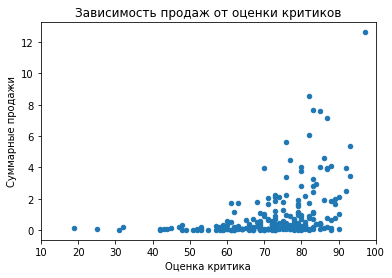

In [49]:
ps4_critic.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', xlim = (10,100))
plt.xlabel('Оценка критика')
plt.ylabel('Суммарные продажи')
plt.title('Зависимость продаж от оценки критиков')
plt.show()

Вывод: В данном случае видно, что  оценка критиков незначительно влияет на повышение спроса у пользователей, но в рамках данного исследования невозможно достоверно оценить какие действия повлияли на рост продаж ввиду ограниченности имеющихся данных.

###### Влияние отзывов на продажи. Продолжение

Определим влияние оценок пользователей и критиков на повышение продаж у остальных платформ. Для этого напишем функцию.

In [50]:
top_other = ['3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

3DS | Коэффициент Пирсона равен: -0.03868032551201218


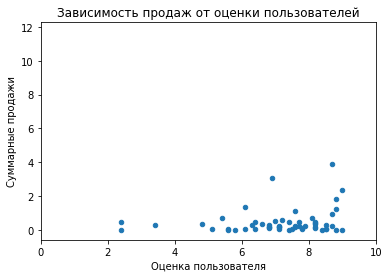

XOne | Коэффициент Пирсона равен: -0.1346278781277099


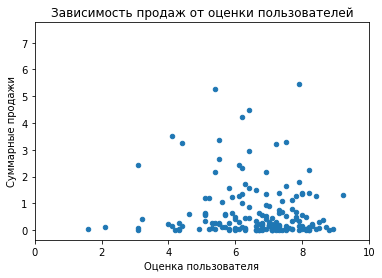

WiiU | Коэффициент Пирсона равен: -0.15072531384499974


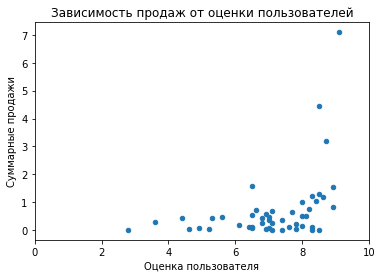

PS3 | Коэффициент Пирсона равен: -0.26753399480163026


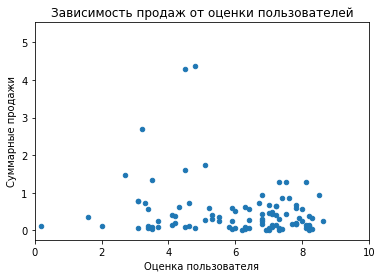

X360 | Коэффициент Пирсона равен: -0.16302156731055795


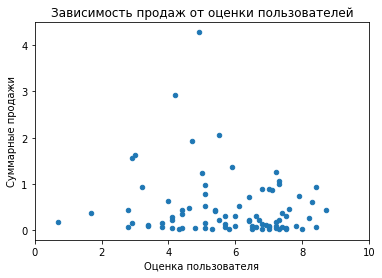

PC | Коэффициент Пирсона равен: -0.11664599520980484


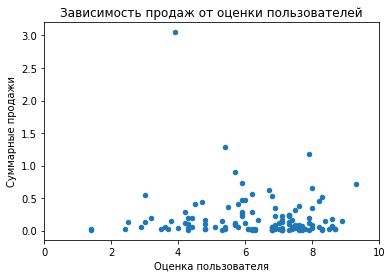

Wii | Коэффициент Пирсона равен: -0.6387038337187684


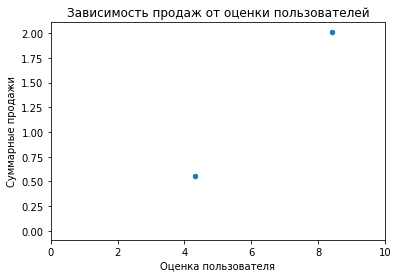

PSV | Коэффициент Пирсона равен: -0.29320588840915496


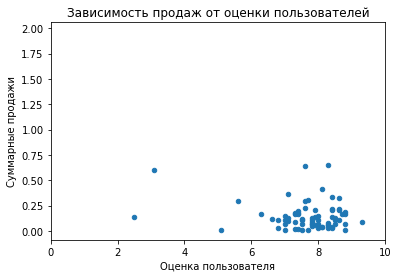

PSP | Коэффициент Пирсона равен: nan


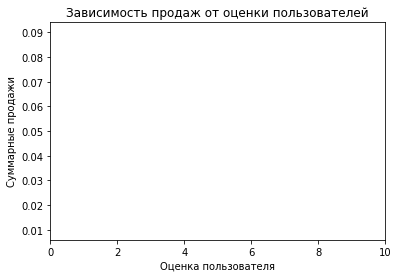

In [51]:
for platform in top_other:
    plat = good_games_user[(good_games_user['platform'] == platform)]
    pirson = plat['user_score'].corr(plat['total_sales'])
    print(platform, '| Коэффициент Пирсона равен:', pirson)
    plat.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', xlim = (0,10))
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Суммарные продажи')
    plt.title('Зависимость продаж от оценки пользователей')
    plt.show()

Вывод: Оценивая зависимость выручки от оценки пользователя для других платформ, можно сделать вывод аналогично предыдущему - пользователи не влияют на прибыль.

3DS | Коэффициент Пирсона равен: 0.314117492869051


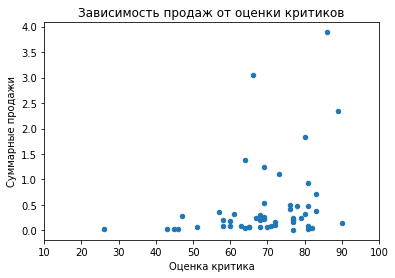

XOne | Коэффициент Пирсона равен: 0.42867694370333226


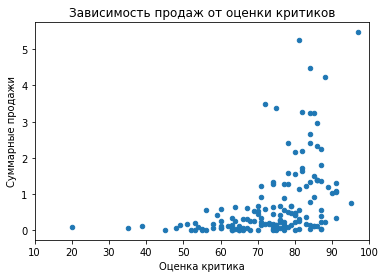

WiiU | Коэффициент Пирсона равен: 0.370201412480884


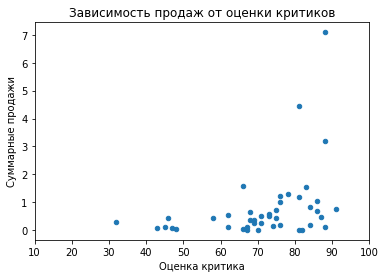

PS3 | Коэффициент Пирсона равен: 0.44657460493190704


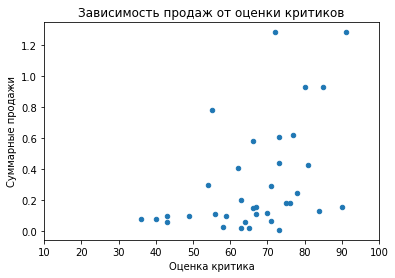

X360 | Коэффициент Пирсона равен: 0.5257228356581523


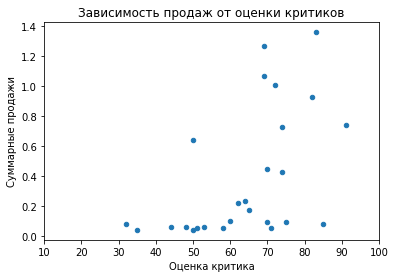

PC | Коэффициент Пирсона равен: 0.17463413769350036


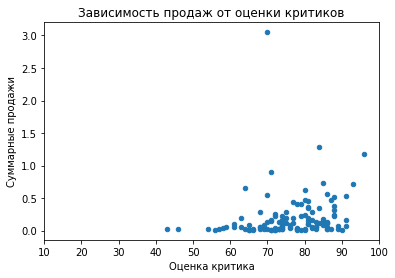

Wii | Коэффициент Пирсона равен: nan


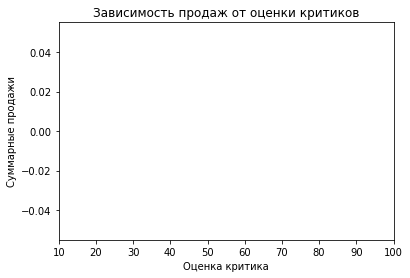

PSV | Коэффициент Пирсона равен: 0.04266490657009526


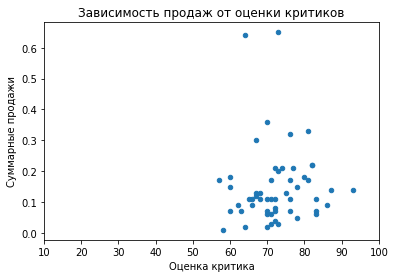

PSP | Коэффициент Пирсона равен: nan


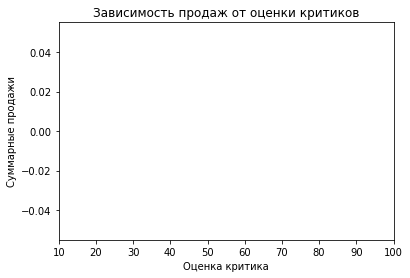

In [52]:
for platform in top_other:
    plat = good_games_critic[(good_games_critic['platform'] == platform)]
    pirson = plat['critic_score'].corr(plat['total_sales'])
    print(platform, '| Коэффициент Пирсона равен:', pirson)
    plat.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', xlim = (10,100))
    plt.xlabel('Оценка критика')
    plt.ylabel('Суммарные продажи')
    plt.title('Зависимость продаж от оценки критиков')
    plt.show()
    

Вывод: Критики тоже, если и влияют на продажи, то весьма незначительно.

### Распределение игр по жанрам

Text(0, 0.5, 'Жанр')

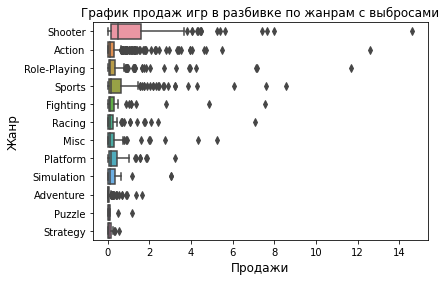

In [53]:
boxplot = sns.boxplot(x = 'total_sales', y = 'genre', data = good_games)
boxplot.axes.set_title("График продаж игр в разбивке по жанрам с выбросами", fontsize=12)
boxplot.set_xlabel("Продажи", fontsize=12)
boxplot.set_ylabel("Жанр", fontsize=12)

Text(0, 0.5, 'Жанр')

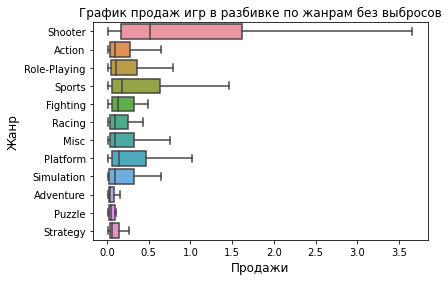

In [54]:
boxplot = sns.boxplot(x = 'total_sales', y = 'genre', data = good_games, showfliers = False)
boxplot.axes.set_title("График продаж игр в разбивке по жанрам без выбросов", fontsize=12)
boxplot.set_xlabel("Продажи", fontsize=12)
boxplot.set_ylabel("Жанр", fontsize=12)

Вывод: Судя по диаграмме размаха в топе всех жанров - шутеры. Они имеют наиболее стабильный и выскоий уровень продаж. На втором месте по стабильности стоит отметить спортивные игры. Также на на второе место я бы поставила экшены, у них часто встречаются аномально успешные игры с хорошей выручкой. В рейтинге аутсайдеровигры следующих жанров - паззлы, стратегии и приключения. 

## Портрет пользователя каждого региона

### Самые популярные платформы

In [55]:
plat_eu_other = []
pop_plat_eu = good_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
for platform in good_platforms:
    if platform not in pop_plat_eu.index:
        plat_eu_other.append(platform)
plat_eu_other = good_games.query('platform == ["WiiU", "X360", "Wii", "PSV", "PSP"]')
other_eu = plat_eu_other['eu_sales'].sum()
pop_plat_eu = good_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
pop_plat_eu = pop_plat_eu.sort_values(by = 'eu_sales', ascending = False).head()
app_eu = pd.DataFrame(other_eu, columns=['eu_sales'], index=['other'])
pop_plat_eu = pop_plat_eu.append(app_eu)

plat_na_other = []
pop_plat_na = good_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
for platform in good_platforms:
    if platform not in pop_plat_na.index:
        plat_na_other.append(platform)
plat_na_other = good_games.query('platform == ["WiiU", "X360", "Wii", "PSV", "PSP"]')
other_na = plat_na_other['na_sales'].sum()
pop_plat_na = good_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
pop_plat_na = pop_plat_na.sort_values(by = 'na_sales', ascending = False).head()
app_na = pd.DataFrame(other_na, columns=['na_sales'], index=['other'])
pop_plat_na = pop_plat_na.append(app_na)

plat_jp_other = []
pop_plat_jp = good_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
for platform in good_platforms:
    if platform not in pop_plat_jp.index:        
        plat_jp_other.append(platform) 
plat_jp_other = good_games.query('platform == ["XOne", "X360", "Wii", "PC", "PSP"]')
other_jp = plat_jp_other['jp_sales'].sum()
pop_plat_jp = good_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
pop_plat_jp = pop_plat_jp.sort_values(by = 'jp_sales', ascending = False).head()
app_jp = pd.DataFrame(other_jp, columns=['jp_sales'], index=['other'])
pop_plat_jp = pop_plat_jp.append(app_jp)

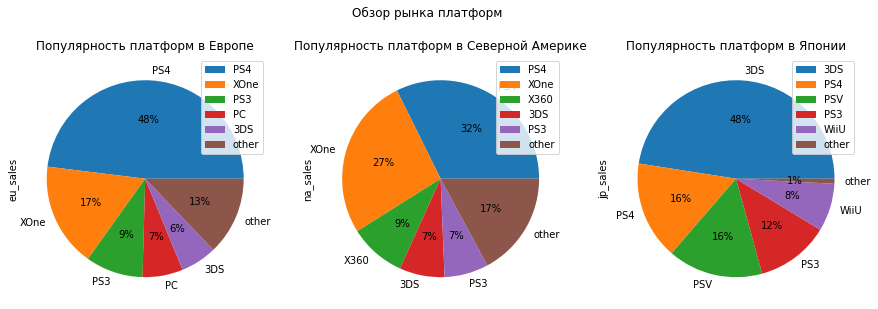

In [56]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))
plt.suptitle('Обзор рынка платформ')
pop_plat_eu.plot(ax = axes[0], kind = 'pie', y = 'eu_sales', autopct='%1.0f%%', title = 'Популярность платформ в Европе' )
pop_plat_na.plot(ax = axes[1], kind = 'pie', y = 'na_sales', autopct='%1.0f%%', title = 'Популярность платформ в Северной Америке')
pop_plat_jp.plot(ax = axes[2], kind = 'pie', y = 'jp_sales', autopct='%1.0f%%', title = 'Популярность платформ в Японии')
plt.show()

Вывод: Самой популярной платформой в Европе и Северной Америке является PS4. Почетное второе место занимает XOne. В Японии ситуация совершенно другая - там в топе 3DS, а XOne не пользуется спросом.

### Самые популярные жанры

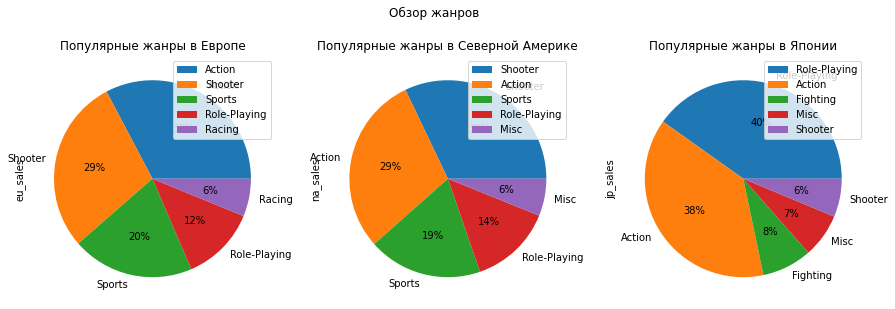

In [58]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))
plt.suptitle('Обзор жанров')
regions = ['eu_sales', 'na_sales', 'jp_sales']
regions_norm = ['Популярные жанры в Европе', 'Популярные жанры в Северной Америке', 'Популярные жанры в Японии']
for i in range(len(regions)):
    pop_genre = good_games.pivot_table(index = 'genre', values = regions[i], aggfunc = 'sum')
    pop_genre = pop_genre.sort_values(by = regions[i], ascending = False).head()
    pop_genre.plot(ax = axes[i], kind = 'pie', y = regions[i], autopct='%1.0f%%', title = regions_norm[i])

Вывод: 

Топ-5 жанров в Европе: экшн, шутер, спортивные игры, ролевые игры и гонки.

Топ-5 жанров в Северной Америке: шутер, экшн, спортивные игры, ролевые игры и аркады.

Топ-5 жанров в Японии: ролевые игры, экшн, файтинги, аркады и шутеры.

#Различия можно объяснить разным менталитетом

### Влияние рейтинга ESRB на продажи

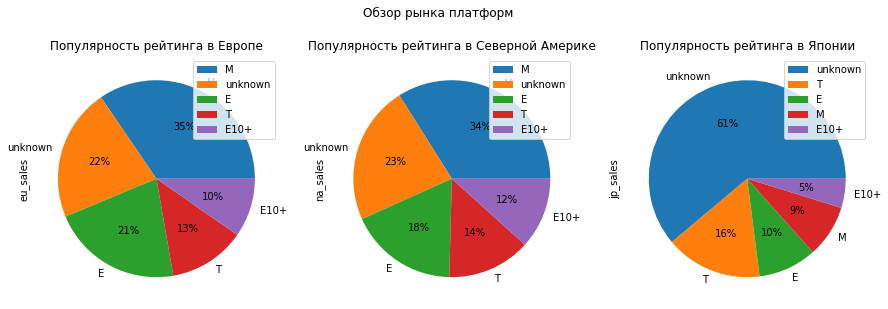

In [61]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))
plt.suptitle('Обзор рынка платформ')
regions = ['eu_sales', 'na_sales', 'jp_sales']
regions_rating = ['Популярность рейтинга в Европе', 'Популярность рейтинга в Северной Америке', 'Популярность рейтинга в Японии']
for i in range(len(regions)):
    good_games_ersb = good_games.pivot_table(index = 'rating', values = regions[i], aggfunc = 'sum')
    good_games_ersb = good_games_ersb.sort_values(by = regions[i], ascending = False).head()
    good_games_ersb.plot(ax = axes[i], kind = 'pie', y = regions[i], autopct='%1.0f%%', title = regions_rating[i])

Вывод: Наибольшую прибыль обеспечивают игры с рейтингом М ('Для взрослых') в Европе. В Свеверной Америке также игры с рейтингом "М", но тажке в лидерах игры с неизветсным рейтингом. В Японии на первом месте игры с неопределенным рейтингом, на втором - с рейтингом Т ('Подросткам').

## Проверка гипотезы

Проверка гипотез начинается с формулировки нулевой гипотезы H_0: «Среднее генеральной совокупности равно A».  Исходя из H_0 сформулируем альтернативную гипотеза H_a. Это утверждение, которое принимается верным, если отбрасывается H_0. 

Для проверки гипотез будем применять t-тест, так как наиболее частые случаи применения t-критерия связаны как раз с проверкой равенства средних значений в двух выборках.

Значение alpha приму за 0.05 чтобы получить результат с 95-процентным уровнем достоверности.

### Проверка 1 гипотезы

H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные.

alpha = 0.05

Для проверки данной гипотезы возьмем данные за последние 10 лет.

In [62]:
xone_pl = games.query('platform == "XOne" & user_score < 10')
xone_user = xone_pl['user_score']
pc_pl = games.query('platform == "PC" & user_score < 10')
pc_user = pc_pl['user_score']

alpha = 0.05 

results = st.ttest_ind(xone_user, pc_user, equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.442937492775816e-06
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC разные. Полученное значение p-value говорит о том, что хотя cредние пользовательские рейтинги платформ Xbox One и PC не равны, с вероятностью менее 0,001% такое или большее различие можно получить случайно. 

### Проверка 2 гипотезы

H_0: Средние пользовательские рейтинги жанров Action и Sports равны.

H_a: Средние пользовательские рейтинги жанров Action и Sports разные.

alpha = 0.05

In [65]:
action = games.query('genre == "Action" & user_score < 10 & year_of_release > 2006')
sports = games.query('genre == "Sports" & user_score < 10 & year_of_release > 2006')
action_user = action['user_score']
sports_user = sports['user_score']

alpha = 0.05 

results = st.ttest_ind(action_user, sports_user, equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.3460764054210946e-11
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные. Полученное значение p-value говорит о том, что хотя cредние пользовательские рейтинги жанров Action и Sports не равны с вероятностью менее 0,001% такое или большее различие можно получить случайно.

## Общий вывод

Был проведен анализ датафрейма с данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах с целью проверки гипотез и построения прогноза на 2017 год.

В результате анализа была выполнена предобработка данных, в ходе которой изучены и заполнены пропущенные значения, изменены типы данных с пояснением, а также в общую таблицу был добавлен столбец с суммарной выручкой, необходимый для дальнейшего анализа.

В ходе исследовательского анализа данных было обнаружено, что основной рост игровой индустрии пришелся на 2004-2008 года. Максимальное количество игр было выпущено 2008-2009 годах, после чего это значение стало снижаться. Выяснили, что самыми прибыльными платформами оказались PS2, X360, PS3, Wii, DS, PS, PS4. Большинство платформ 'живут' в течение 10 лет после выхода, а наибольшую прибыль приносят в первые 5 лет существования. 

Для верного построения прогноза на 2017 год определили актуальный период с 2013 по 2016 год. В таком случае в топ-5 наиболее прибыльных платформ вошли следующие: 'PS4', 'XOne', '3DS', 'PS3', 'X360'. Однако, X360 и PS3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными в 2017 году. Построение диаграмм рассеяния и нахождение коэффициента корреляции помогло увидеть, что высокая оценка пользователя совсем не гарантирует высокую прибыль от игры, и оценка критиков совсем незначительно влияет на повышение спроса у пользователей. Самыми прибыльными жанрами оказались экшены, шутеры, РПГ(ролевые игры) и спортивные симуляторы. В рейтинге аутсайдеров паззлы, стратегии и симуляторы.

Портрет пользователя в Европе: Предпочитает игры в стиле экшн или шутер на платформе PS4 с рейтингом 'М'.
Портрет пользователя в Северной Америке: Предпочитает игры в стиле шутер на платформе PS4 или XOne с рейтингом 'М'.
Портрет пользователя в Японии: Предпочитает игры в жанре 'ролевые игры' на платформе 3DS без определенного рейтинга.

В конце были сформулированы и проверены 2 гипотезы, которые показали, что средние пользовательские рейтинги платформ Xbox One и PC не равны и средние пользовательские рейтинги жанров Action и Sports не равны.

В 2017 году я бы рекомендовала сделать ставку на игры для взрослых (рейтинг ‘M’) в жанре экшн или шутер на платформах PS4 и XOne. Также можно рассмотреть игры на платформе 3DS с большим количеством копий. Аналогично не стоит забывать про PC, так как характеристики персональных компьютеров улучшаются с годами и выпуск игр на них не теряют своей акутальности.
